In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [3]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(10, activation='softmax'))


model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(train_x,train_y,epochs=6,validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 24s 16ms/step - loss: 1.1800 - accuracy: 0.6612 - val_loss: 0.4637 - val_accuracy: 0.8347
Epoch 2/6
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3962 - accuracy: 0.8574 - val_loss: 0.3391 - val_accuracy: 0.8788
Epoch 3/6
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3241 - accuracy: 0.8828 - val_loss: 0.3350 - val_accuracy: 0.8821
Epoch 4/6
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2949 - accuracy: 0.8910 - val_loss: 0.3280 - val_accuracy: 0.8851
Epoch 5/6
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2768 - accuracy: 0.8988 - val_loss: 0.3058 - val_accuracy: 0.8886
Epoch 6/6
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2641 - accuracy: 0.9028 - val_loss: 0.3203 - val_accuracy: 0.8852


In [6]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.8814


In [7]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [24]:
prediction = model.predict(test_x[:92])

3/3 [==============================] - 0s 4ms/step


In [29]:
prediction[2]

array([9.9999875e-01, 1.0000000e+00, 9.9999839e-01, 9.9999952e-01,
       1.0000000e+00, 9.9948359e-01, 9.9998981e-01, 9.0228951e-01,
       9.9993509e-01, 1.0190084e-05], dtype=float32)

In [30]:
label = labels[np.argmax(prediction[2])]

trouser


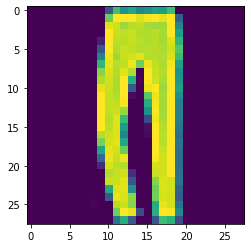

In [31]:
plt.imshow(test_x[:92][2])
print(label)